<a href="https://colab.research.google.com/github/RodriguesL1/DatathonFiap/blob/main/prev_qtd_aluno_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from prophet import Prophet



In [41]:
url = '/content/Numero de alunos.xlsx'

In [72]:
df = pd.read_excel(url)

In [ ]:
#df= df[['ano','qtd_aluno']]

In [73]:
df.head()

,ds,y
0,2016-01-01,70
1,2017-01-01,300
2,2018-01-01,550
3,2019-01-01,812
4,2020-01-01,841


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7 non-null      datetime64[ns]
 1   y       7 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 240.0 bytes


In [ ]:
#df=df.rename(columns={'DS': 'ds', 'Y':'y'})

In [64]:
df['rolling_seasonality'] = df['y'].rolling(window=365).mean()

In [82]:
m = Prophet(yearly_seasonality=True)
#m.add_seasonality(name='custom_seasonality', period=365, fourier_order=5, mode='multiplicative')
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21gaxrlc/d2jos2cb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21gaxrlc/7tepxf4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56775', 'data', 'file=/tmp/tmp21gaxrlc/d2jos2cb.json', 'init=/tmp/tmp21gaxrlc/7tepxf4n.json', 'output', 'file=/tmp/tmp21gaxrlc/prophet_modelv5q7a3o1/prophet_model-20240318055117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [83]:
future_dates = m.make_future_dataframe(periods=3, freq='YS')
future

,ds
0,2016-01-01
1,2017-01-01
2,2018-01-01
3,2019-01-01
4,2020-01-01
5,2021-01-01
6,2022-01-01
7,2022-01-02
8,2022-01-03
9,2022-01-04


In [84]:
df

,ds,y
0,2016-01-01,70
1,2017-01-01,300
2,2018-01-01,550
3,2019-01-01,812
4,2020-01-01,841
5,2021-01-01,824
6,2022-01-01,970


In [85]:
forecast = m.predict(future_dates)


In [86]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
5,2021-01-01,881.326391,744.289940,1011.321549
6,2022-01-01,1057.530469,934.864227,1186.020029
7,2023-01-01,1227.868454,1098.796228,1352.545603
8,2024-01-01,1392.311088,1271.547993,1515.360386
9,2025-01-01,1468.733653,1347.540086,1593.588255


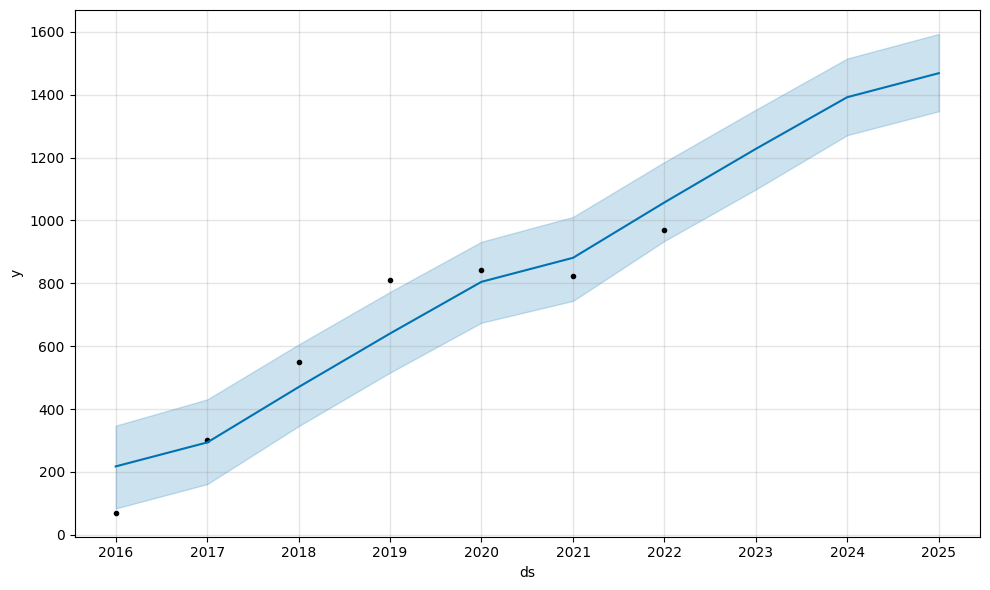

In [87]:
fig1 = m.plot(forecast)
